# Daten schreiben und herunterladen

In [1]:
from astroquery.gaia import Gaia
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity

import matplotlib.pyplot as plt
import numpy as np
import math

Status messages could not be retrieved


## Anfrage an die Datenbank senden und speichern

In [2]:
Anfrage_database3 = Gaia.launch_job_async("SELECT *\
FROM gaiadr3.gaia_source \
WHERE CONTAINS(POINT(gaiadr3.gaia_source.ra,gaiadr3.gaia_source.dec),CIRCLE(56.85,24.117,2))=1; \
AND NOT prallax IS NULL \
AND NOT prallax IS '--' \
AND NOT phot_g_mean_mag IS NULL" \
, dump_to_file=False)

results = Anfrage_database3.get_results()

SSLCertVerificationError: [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:992)

In [3]:
# Extrahieren der erforderlichen Daten
#ra = results['ra'][0] # Rektaszension (in Grad)
#dec = results['dec'][0] # Deklination (in Grad)
#pmra = results['pmra'][0] # Eigenbewegung in Rektaszension (in mas/Jahr)
#pmdec = results['pmdec'][0] # Eigenbewegung in Deklination (in mas/Jahr)
#ref_epoch = results['ref_epoch'][0] # Referenzepoch (in Jahren)
#parallax in millibogensekunden
Filter = ["source_id", "ra", "dec", "pmra", "pmdec", "ref_epoch", "parallax", "phot_g_mean_mag"]
Gefiltert = results[Filter]

In [3]:
def get_position_on_year(year, start_epoch, start_ra, start_dec, v_ra, v_dec):
    # target_year, ref_epoch, ra, dec, pmra, pmdec

    # Berechnen der Zeitdifferenzen zur Referenzepoch
    time_diff1 = (year - start_epoch)

    # Berechnung der Positionen zu den gewünschten Zeitpunkten
    ra_epoch1 = start_ra + v_ra * time_diff1 / 1000.0 / 3600.0
    dec_epoch1 = start_dec + v_dec * time_diff1 / 1000.0 / 3600.0

    return ra_epoch1, dec_epoch1


file = open("textdatei.tx" ,"a")
#print(t)
file.close()

## Aufbereitung der Daten in ein kathesisches Koordinatensystem

In [14]:
import math

Liste = []
Koordinaten = []
Koordinaten2024 = []

def get_pos_xyz(ra, dec, parallax):
    phi = dec*math.pi/180
    labda = ra*math.pi/180
    x = math.sin(labda) * math.sin(math.pi/2 - phi) * parallax
    y = math.cos(labda) * math.sin(math.pi/2 - phi) * parallax
    z = math.sin(phi) * parallax
    return x, y, z


for i in Gefiltert:
    if str(i['parallax']) != "--" and i['parallax'] != None:
        Liste.append((i["source_id"], i['parallax'], i['ra'], i['dec']))

        ra, dec = get_position_on_year(-500000, i['ref_epoch'], i['ra'], i['dec'], i['pmra'], i['pmdec'])
        x4, y4, z4 = get_pos_xyz(ra, dec, i['parallax'])
        x, y, z = get_pos_xyz(i['ra'], i['dec'], i['parallax'])

        Koordinaten2024.append((x4, y4, z4))
        Koordinaten.append((x, y, z))
        print(round(x, 5), round(y, 5), round(z, 5))


-0.03564 -0.02264 -0.01787
0.28553 0.18126 0.14314
0.12998 0.08411 0.06878
0.33918 0.20886 0.16657
0.23686 0.14599 0.11634
-1.43363 -0.88374 -0.70426
1.3932 0.85896 0.68426
0.67796 0.41787 0.3331
1.3777 0.84893 0.67662
0.02525 0.01553 0.01241
0.46135 0.28425 0.22681
0.48917 0.30135 0.24048
0.4932 0.30382 0.24246
0.8731 0.53751 0.42944
0.33111 0.20383 0.16276
0.17533 0.10794 0.08617
0.25556 0.15763 0.12561
3.65834 2.25548 1.79792
1.95533 1.20574 0.96101
4.44957 2.74328 2.18679
-0.27266 -0.16812 -0.13396
3.67507 2.26612 1.80564
0.02064 0.01273 0.01015
0.73683 0.4542 0.36219
0.96403 0.59419 0.47379
0.20486 0.12639 0.10075
0.09187 0.05667 0.04517
0.19275 0.11848 0.09498
0.35713 0.22029 0.17566
0.25818 0.15903 0.12702
1.00648 0.62042 0.49518
0.09006 0.05552 0.04431
0.64184 0.39564 0.31577
0.62914 0.38754 0.30967
2.42181 1.49221 1.19251
0.83164 0.51164 0.40885
0.37776 0.23235 0.18573
0.87963 0.54107 0.43239
0.47825 0.29418 0.23505
-0.16563 -0.10183 -0.08146
0.84166 0.51747 0.41406
1.39955 0.

In [17]:
file = open("Ergebnisse.txt", "w")
def get_speed_xyz(enra, endec, parallax):
    ### Berechne Radialgeschwindigkeiten
    phi = dec*math.pi/180
    labda = ra*math.pi/180
    x = math.sin(labda) * math.sin(math.pi/2 - phi) * parallax
    y = math.cos(labda) * math.sin(math.pi/2 - phi) * parallax
    z = math.sin(phi) * parallax
    return x, y, z

t = ""
for stern in range(len(Gefiltert["source_id"])): 
    Ls = 1
    Ms = 4.83
    d = 1000/(abs(Gefiltert["parallax"][stern])) # parallaxen komisch
    Mg = float(Gefiltert["phot_g_mean_mag"][stern]) - 5 * math.log10(d/10)
    L = Ls * (10**(0.4*(Ms - Mg)))
    m = L**(2/7)
    x, y, z = get_pos_xyz(Gefiltert["ra"][stern], Gefiltert["dec"][stern], Gefiltert["parallax"][stern])
    pmra, pmdec = get_position_on_year(2016, 2015, Gefiltert["ra"][stern], Gefiltert["dec"][stern], Gefiltert["pmra"][stern], Gefiltert["pmdec"][stern])
    sx, sy, sz = get_pos_xyz(pmra, pmdec, Gefiltert["parallax"][stern])
    t += str(Gefiltert["source_id"][stern]) + ", " + str(x)  + ", " + str(y) + ", " + str(z) + ", " + str(sx)  + ", " + str(sy) + ", " + str(sz)+ ", " + str(m)
    t = t[:-2] + "\n"
#print(t)
file.write(t)
file.close()

C:\Users\Feuer\AppData\Local\Temp\ipykernel_24268\1192915253.py:15: UserWarning: Warning: converting a masked element to nan.
  Mg = float(Gefiltert["phot_g_mean_mag"][stern]) - 5 * math.log10(d/10)


AttributeError: 'MaskedConstant' object has no attribute 'value'

## Ausgabe der Daten mit math.plotlib

NameError: name 'Koordinaten' is not defined

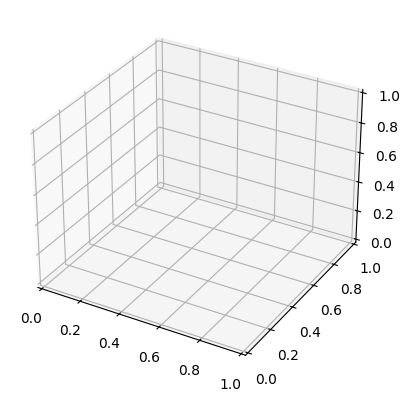

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for i in Koordinaten:
    ax.scatter(i[0], i[1], i[2], marker="x")

ax.set_xlabel('X-Achse')
ax.set_ylabel('Y-Achse')
ax.set_zlabel('Z-Achse')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

ax4 = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for i in Koordinaten2024:
    ax4.scatter(i[0], i[1], i[2], marker="x")

ax4.set_xlabel('X-Achse')
ax4.set_ylabel('Y-Achse')
ax4.set_zlabel('Z-Achse')

plt.show()

KeyboardInterrupt: 